#**Institución Universitaria Pascual Bravo**
#Curso: Reconocimiento de patrones 2024-1

#Docente: Juan Carlos Briñez de León
#Histogramas de Gradientes Orientados HOG

El descriptor de Histograma de Gradientes Orientados (HOG, por sus siglas en inglés, Histogram of Oriented Gradients) es una técnica ampliamente utilizada en visión por computadora para describir la forma y la textura de objetos en una imagen. El HOG se basa en la dirección de los gradientes locales en una imagen y se utiliza comúnmente en tareas como detección de objetos y seguimiento.

1. Preprocesamiento de la imagen:

    - Convertir la imagen en escala de grises.
    - Calcular los gradientes horizontal y vertical utilizando convolución con
      filtros Sobel.
    - Calcular la magnitud y dirección de los gradientes.

2. División de la imagen en celdas:

    - La imagen se divide en patch (pequeñas regiones de píxeles),  típicamente de 8x8 píxeles.

3. Construcción del histograma de gradientes:

    - Para cada patch, se calcula un histograma de direcciones de gradientes.
    - Los gradientes se ponderan por la magnitud del gradiente.
    - El histograma generalmente tiene 9 bins (rangos de direcciones) que cubren 0-180 grados.

4. Normalización de bloques:

    - Los histogramas de patch adyacentes se combinan en bloques solapados.
Cada bloque se normaliza para mejorar la invarianza ante cambios en la iluminación y el contraste.

5. Concatenación de descriptores:

    - Los descriptores normalizados se concatenan para formar el descriptor HOG final de la imagen.

=============================Código HOG==============================

In [1]:
import numpy as np
import cv2

def calculate_gradients(image):
    # Calcular los gradientes en las direcciones horizontal y vertical
    kernel_x = np.array([[-1, 0, 1]])
    kernel_y = np.array([[-1], [0], [1]])

    grad_x = cv2.filter2D(image, -1, kernel_x)
    grad_y = cv2.filter2D(image, -1, kernel_y)

    return grad_x, grad_y

def calculate_magnitude_and_angle(grad_x, grad_y):
    # Calcular la magnitud y el ángulo de los gradientes
    magnitude = np.sqrt(grad_x**2 + grad_y**2) #Pitágoras
    angle = np.arctan2(grad_y, grad_x) * 180 / np.pi  # Convertir a grados mediante tangente inversa

    return magnitude, angle

def calculate_hog_descriptor(magnitude, angle, cell_size, block_size, num_bins):
    height, width = magnitude.shape
    cell_height, cell_width = cell_size
    block_height, block_width = block_size

    # Inicializar el descriptor HOG
    hog_descriptor = []

    for i in range(0, height, cell_height):
        for j in range(0, width, cell_width):
            cell_magnitude = magnitude[i:i+cell_height, j:j+cell_width] #Recorta patch
            cell_angle = angle[i:i+cell_height, j:j+cell_width] #Recorta Patch

            # Calcular el histograma de gradientes para cada patch
            hist = np.zeros(num_bins)
            for m in range(cell_height):
                for n in range(cell_width):
                    bin_idx = int((cell_angle[m-1, n-1] + 180) * num_bins / 360)
                    hist[bin_idx] += cell_magnitude[m-1, n-1]

            hog_descriptor.extend(hist)

    return np.array(hog_descriptor)

def visualize_oriented_gradients(image, magnitude, angle):
    # Crear una imagen en blanco para visualizar los gradientes orientados
    oriented_gradients_image = np.zeros_like(image)

    # Escalar los gradientes para que se puedan visualizar
    max_magnitude = np.max(magnitude)
    scaled_magnitude = (magnitude / max_magnitude) * 255

    # Calcular los componentes x e y de los gradientes orientados
    grad_x = scaled_magnitude * np.cos(np.radians(angle))
    grad_y = scaled_magnitude * np.sin(np.radians(angle))

    # Asignar los gradientes orientados a la imagen
    oriented_gradients_image = cv2.addWeighted(np.uint8(oriented_gradients_image), 1, np.uint8(grad_x), 1, 0)
    oriented_gradients_image = cv2.addWeighted(np.uint8(oriented_gradients_image), 1, np.uint8(grad_y), 1, 0)

    return oriented_gradients_image

In [2]:
# Conectando el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


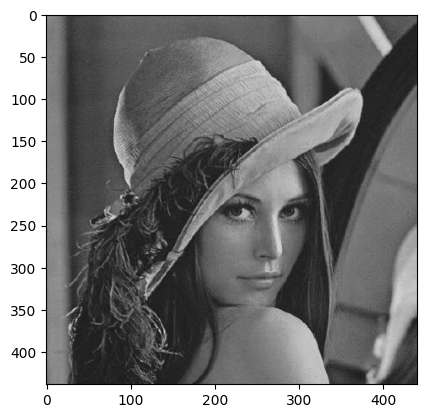

In [3]:
# Cargar la imagen en escala de grises
import matplotlib.pyplot as plt

Ruta = '/content/drive/MyDrive/Cursos IUPB 2024-1/Reconocimiento de patrones/Material de clase/Semana 11 y 12/HOG/'
Img = cv2.imread(Ruta+'Lena.png')
Img=cv2.cvtColor(Img,cv2.COLOR_BGR2GRAY)
plt.imshow(Img,vmin=0,vmax=255,cmap='gray')
plt.show()

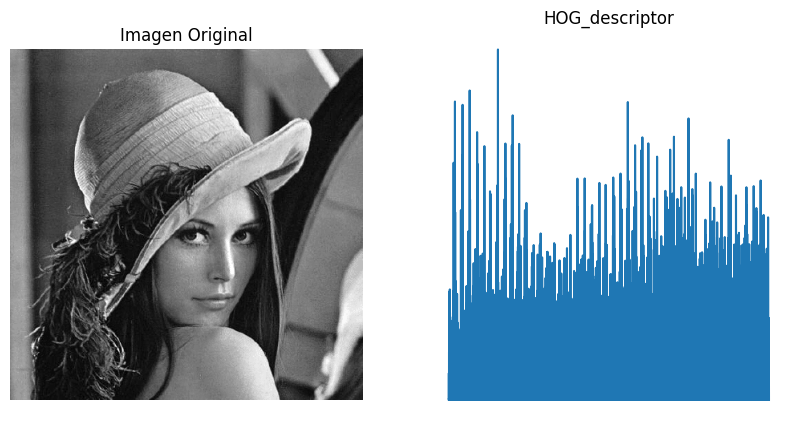

In [4]:
# Definir los parámetros
pixels_per_cell = (10,10)
cells_per_block = (2, 2)
orientations = 20

# Calcular los gradientes
grad_x, grad_y = calculate_gradients(Img)

# Calcular la magnitud y el ángulo de los gradientes
magnitude, angle = calculate_magnitude_and_angle(grad_x, grad_y)

# Calcular el descriptor HOG
hog_descriptor = calculate_hog_descriptor(magnitude, angle, pixels_per_cell, cells_per_block, orientations)

 # Visualizar los gradientes orientados
HOG_image = visualize_oriented_gradients(Img, magnitude, angle)


plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(Img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.subplot(122)
plt.plot(hog_descriptor)
plt.title('HOG_descriptor')
plt.axis('off')
plt.show()

**Implementación HOG librerías**

<ipython-input-7-25620358d935>:5: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_descriptor_2, HOG_IMG = hog(Img, orientations = 6, pixels_per_cell=(20, 20),cells_per_block=(2, 2), visualize=True, multichannel=False)


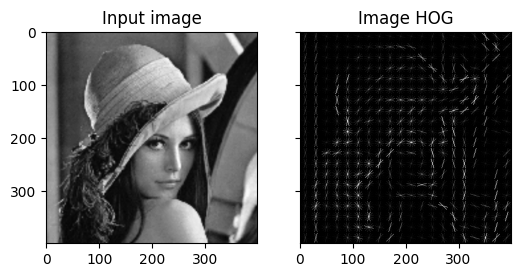

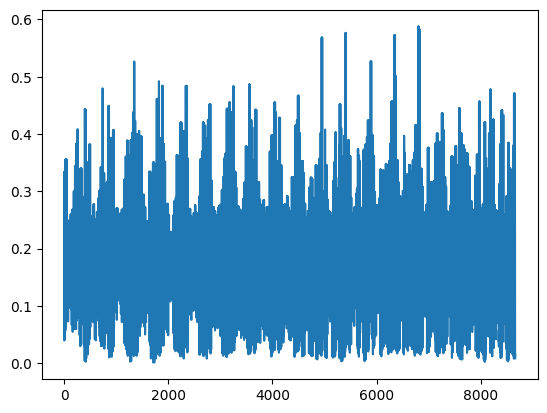

(8664,)


In [7]:
from skimage.feature import hog
from skimage import exposure

Img=cv2.resize(Img,(400,400))
hog_descriptor_2, HOG_IMG = hog(Img, orientations = 6, pixels_per_cell=(20, 20),cells_per_block=(2, 2), visualize=True, multichannel=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 6), sharex=True, sharey=True)

#ax1.axis('off')
ax1.imshow(Img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(HOG_IMG, in_range=(0, 10))

#ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Image HOG')
plt.show()

plt.plot(hog_descriptor_2)
plt.show()

print(hog_descriptor_2.shape)

Utilizando el descriptor

In [10]:
#Cargando una imagen de prueba.
import cv2 # OpenCV para computer vision
import numpy as np
import matplotlib.pyplot as plt #Para graficar
from skimage.feature import hog

#Cargando datos rostros Pascual
Ruta_dataset = '/content/drive/MyDrive/Cursos IUPB 2024-1/Reconocimiento de patrones/Material de clase/Semana 9/Face recognition/train_test'
Filas = 600
Columnas = 600

Longitud = 1176

# Aplicando el proceso a todas las imágenes (Tomando regiones de los rostros)
Matriz_Características = np.zeros((35,Longitud+1)) #16 vectores LBP y las etiquitas

for i in range(1,36,1):
  Ruta=Ruta_dataset + '/' + str(i) + '.jpg'
  img=cv2.imread(Ruta)
  I_gris=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  I_gris=cv2.resize(I_gris, (Filas,Columnas), interpolation = cv2.INTER_AREA)

  #Recortando región de rostro con Haar Cascade
  Detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  Cara = Detector.detectMultiScale(I_gris, scaleFactor=1.1, minNeighbors=10, minSize=(20,20), maxSize=(300,300))

  for (x,y,w,h) in Cara:
    Recorte = I_gris[y:y+h,x:x+w]

  del Cara

  Recorte = cv2.resize(np.uint8(Recorte), (160,160))
  Vector_Hog, HOG_IMG = hog(Recorte, orientations = 6, pixels_per_cell=(20, 20),cells_per_block=(2, 2), visualize=True)
  Matriz_Características[i-1,:-1] = Vector_Hog



  if i>=1 and i<=5:
    Matriz_Características[i-1,-1] = 1
  else:
    if i>=6 and i<=10:
      Matriz_Características[i-1,-1]=2
    else:
      if i>=11 and i<=15:
        Matriz_Características[i-1,-1]=3
      else:
        if i>=16 and i<=20:
          Matriz_Características[i-1,-1]=4
        else:
          if i>=21 and i<=25:
            Matriz_Características[i-1,-1]=5
          else:
            if i>=26 and i<=30:
              Matriz_Características[i-1,-1]=6
            else:
                Matriz_Características[i-1,-1]=7

print(Matriz_Características.shape)

(35, 1177)


In [11]:
#Dividing dataset into input (X) and output (Y) variables
X = Matriz_Características[:,:-1]
Y = Matriz_Características[:,-1]

#Dividiendo el conjunto de imágenes
from sklearn.model_selection import StratifiedShuffleSplit
Indices = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=18)
for train_index, test_index in Indices.split(X, Y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(28, 1176) (28,)
(7, 1176) (7,)


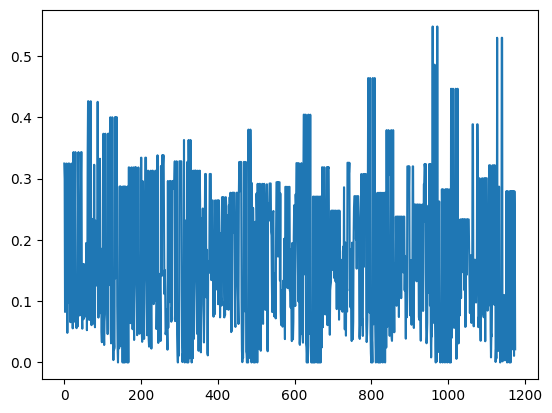

184.0878739357761


In [12]:
#Graficando características de un rostro
import matplotlib.pyplot as plt
x = np.zeros((1,Longitud))
x[0,:] = np.arange(0,Longitud,1)
plt.plot(x[0,:],X_train[6,:])
plt.show()

print(X_train[13,:].sum())

Entrenamiento del modelo finalizado
 
Mostrando métricas globales individuales: 
Accuracy KNN 0.7142857142857143
Precision KNN 0.619047619047619
Recall KNN 0.7142857142857143
F1_Score KNN 0.6428571428571429
 
Reporte de Clasificación:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       0.33      1.00      0.50         1
         3.0       1.00      1.00      1.00         1
         4.0       0.00      0.00      0.00         1
         5.0       1.00      1.00      1.00         1
         6.0       0.00      0.00      0.00         1
         7.0       1.00      1.00      1.00         1

    accuracy                           0.71         7
   macro avg       0.62      0.71      0.64         7
weighted avg       0.62      0.71      0.64         7

 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

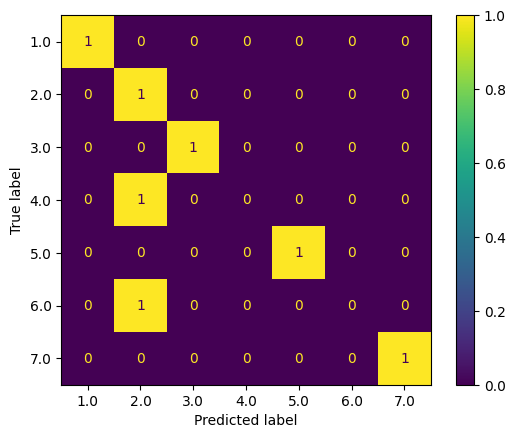

In [13]:
#Evaluando casos mediante todos los clasificadores
from sklearn.neighbors import KNeighborsClassifier
Modelo_0 = KNeighborsClassifier(3)
Modelo_0.fit(X_train, Y_train)
Y_pred_0 =Modelo_0.predict (X_test)
print('Entrenamiento del modelo finalizado')
print(" ")

from sklearn.metrics import confusion_matrix as CM,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score as ACC
from sklearn.metrics import precision_score as PR
from sklearn.metrics import recall_score as RC
from sklearn.metrics import f1_score as F1
from sklearn.metrics import classification_report

print('Mostrando métricas globales individuales: ')
print("Accuracy KNN",ACC(Y_test, Y_pred_0))
print("Precision KNN",PR(Y_test, Y_pred_0, average='macro'))
print("Recall KNN",RC(Y_test, Y_pred_0, average='macro'))
print("F1_Score KNN",F1(Y_test, Y_pred_0, average='macro'))
print(' ')

report = classification_report(Y_test, Y_pred_0)
print("Reporte de Clasificación:\n", report)
print(' ')

Matriz = CM(Y_test, Y_pred_0, labels = Modelo_0.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=Matriz,display_labels  =Modelo_0.classes_)
disp.plot()

Otros descriptores. [Aquí](https://scikit-image.org/docs/stable/api/skimage.feature.html)